# HW3 - Basic exploratory data analysis in Python
# Justin Sarna

Import necessary applications for the assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from pandas import Series, DataFrame
from datetime import datetime


Read the trip data into a pandas DataFrame named trip.

In [3]:
trip = pd.read_csv('./data/trip.csv', parse_dates=['starttime', 'stoptime'])

In [3]:
# Use the info() method to check out the structure of the dataframe.
DataFrame.info(trip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 26.3+ MB


In [4]:
# Now I'm adding a date column for convenience

trip['tripdate'] = trip.starttime.map(lambda x: x.date())

In [5]:
# You add one for day of week (integer values for day: Monday = 0, Sunday = 6)

trip['tripday'] = trip.starttime.map(lambda x: x.weekday())

Chose to print the head of the data frame to verify date and day of week column were added properly

In [6]:
DataFrame.head(trip)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripdate,tripday
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,0


Use the describe() method to get a quick statistical summary of your new weekday field. In particular, what are the min and max values for weekday? With what days of the week are these associated?

Describe method used to view summary statistics just for tripday(weekday). Monday = 0, Sunday = 6

*could simply view summary for all by () instead of ['tripday']

In [7]:
# Use pandas.DataFrame.describe for statistical summary
DataFrame.describe(trip['tripday'])


count    286857.000000
mean          2.875349
std           1.944857
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: tripday, dtype: float64

## Step 3 - Basic group by analysis

### Question 3.1 - Summaries by destination station

There are three sub-questions to answer. Answer them right in the notebook. I give skeleton code and hints.

### Q 3.1.1 - counts by destination station

How many trips are there to each destination (`to_station_id`)? 
```
grp_to =
trips_by_to = ???
trips_by_to
```

Here's the first few lines of the resulting pandas `Series`.

```
to_station_id
8D OPS 02            2
BT-01            10737
BT-03             6457
BT-04             4066
BT-05             6367
CBD-03            7268
CBD-04            2819
```

In [8]:
# Answer 3.1.1
# Using groupby to create groups of each station id
# Then set variable trips_by_to = to the size (number of elements) in each group
grp_to = trip.groupby('to_station_id')
trips_by_to = grp_to.size()
DataFrame.head(trips_by_to)

to_station_id
8D OPS 02        2
BT-01        10737
BT-03         6457
BT-04         4066
BT-05         6367
dtype: int64

Now display `trips_by_to` sorted in descending order of the number of trips. Here's the first few lines:
```
to_station_id
CBD-13           13784
WF-01            13736
SLU-15           10961
BT-01            10737
SLU-07           10632
PS-04             9584
SLU-04            9305
SLU-16            9114
```

In [9]:
# Checking data type of trips_by_to to know how to sort
type(trips_by_to)

pandas.core.series.Series

In [10]:
# Sort trips_by_to series by descending by number of trips
sorted = trips_by_to.sort_values(ascending = False)
print (sorted)

to_station_id
CBD-13           13784
WF-01            13736
SLU-15           10961
BT-01            10737
SLU-07           10632
PS-04             9584
SLU-04            9305
SLU-16            9114
WF-04             8931
CBD-05            8713
SLU-01            8671
CBD-06            8539
SLU-19            8067
SLU-02            7497
EL-03             7274
CBD-03            7268
DPD-01            6968
PS-05             6744
BT-03             6457
BT-05             6367
CH-08             6196
SLU-17            6110
CH-02             5847
UD-04             4807
EL-05             4714
ID-04             4612
UD-01             4309
BT-04             4066
EL-01             4061
CH-12             4001
                 ...  
CH-01             3918
CH-09             3743
CH-03             3617
SLU-18            3556
CH-07             3408
UW-04             3152
FH-04             3076
CBD-04            2819
UW-06             2565
CH-15             2419
CH-05             2391
SLU-20            21

### Q 3.1.2 - mean trip duration by (`from_station_id`, `to_station_id`)?

What is the mean trip duration by from, to pair?

```
mean_duration_by_trip = ???
mean_duration_by_trip
```


Here's the first few lines of the resulting `Series`. You'll notice that the index for the `mean_delay_by_trip` Series consists of two fields, `from_station_id` and `to_station_id`. This is called a MultiIndex.

```
from_station_id  to_station_id
8D OPS 02        8D OPS 02          133.617500
BT-01            BT-01             3116.766550
                 BT-03              763.744647
                 BT-04              618.807898
                 BT-05              891.194747
                 CBD-03            1177.592991
```

In [12]:
# Answer 3.1.2
# set a variable = dataframe MultiIndex grouping of station pairs, then find the mean of the each pair's tripduration
mean_duration_by_trip = trip.groupby(['from_station_id','to_station_id'])['tripduration'].mean()
mean_duration_by_trip

from_station_id  to_station_id
8D OPS 02        8D OPS 02          133.617500
BT-01            BT-01             3116.766550
                 BT-03              763.744647
                 BT-04              618.807898
                 BT-05              891.194747
                 CBD-03            1177.592991
                 CBD-04            1329.307859
                 CBD-05            1847.803544
                 CBD-06             790.706811
                 CBD-07            1359.281280
                 CBD-13             966.234467
                 CD-01             1923.977000
                 CH-01             1329.636910
                 CH-02             2443.826880
                 CH-03             1363.522750
                 CH-05             2924.112783
                 CH-06             2162.757667
                 CH-07             4433.419000
                 CH-08             1757.115379
                 CH-09             1697.381265
                 CH-12       

Using the `mean_duration_by_trip` Series, return the mean trip duration from WF-01 to UW-10. 

In [13]:
# index used to examine structure of mean duration by trip dataframe (MultiIndex)
mean_duration_by_trip.index

MultiIndex(levels=[['8D OPS 02', 'BT-01', 'BT-03', 'BT-04', 'BT-05', 'CBD-03', 'CBD-04', 'CBD-05', 'CBD-06', 'CBD-07', 'CBD-13', 'CD-01', 'CH-01', 'CH-02', 'CH-03', 'CH-05', 'CH-06', 'CH-07', 'CH-08', 'CH-09', 'CH-12', 'CH-15', 'CH-16', 'DPD-01', 'DPD-03', 'EL-01', 'EL-03', 'EL-05', 'FH-01', 'FH-04', 'ID-04', 'PS-04', 'PS-05', 'Pronto shop', 'Pronto shop 2', 'SLU-01', 'SLU-02', 'SLU-04', 'SLU-07', 'SLU-15', 'SLU-16', 'SLU-17', 'SLU-18', 'SLU-19', 'SLU-20', 'SLU-21', 'SLU-22', 'UD-01', 'UD-02', 'UD-04', 'UD-07', 'UW-01', 'UW-02', 'UW-04', 'UW-06', 'UW-07', 'UW-10', 'UW-11', 'WF-01', 'WF-03', 'WF-04'], ['8D OPS 02', 'BT-01', 'BT-03', 'BT-04', 'BT-05', 'CBD-03', 'CBD-04', 'CBD-05', 'CBD-06', 'CBD-07', 'CBD-13', 'CD-01', 'CH-01', 'CH-02', 'CH-03', 'CH-05', 'CH-06', 'CH-07', 'CH-08', 'CH-09', 'CH-12', 'CH-15', 'CH-16', 'DPD-01', 'DPD-03', 'EL-01', 'EL-03', 'EL-05', 'FH-01', 'FH-04', 'ID-04', 'PS-04', 'PS-05', 'Pronto shop', 'Pronto shop 2', 'SLU-01', 'SLU-02', 'SLU-04', 'SLU-07', 'SLU-15', 

In [14]:
# Your answer here for mean trip duration from WF-01 to UW-10.
mean_duration_by_trip[('WF-01','UW-10')].mean()

5803.3555000000006

### Q 3.1.3 - trip duration stats by origination

Now return the count, mean, standard deviation, 25th, 50th, 75th percentiles, and max of
trip duration by origination station. Store the result in a `DataFrame` called
`tripduration_summary`. Then sort it descending by count and then display the first 10 rows
from `tripduration_summary`. Here's a code skeleton:

```
tripduration_summary = ???
tripduration_summary ??? 
???
```

Here's the answer:

```
                   count         mean          std     min        25%  \
from_station_id                                                         
WF-01            13054.0  2086.617697  2518.850886  60.275  664.48200   
CH-07            11392.0   703.375831  1191.253995  62.733  356.96425   
BT-01            10934.0  1396.320262  2030.985034  60.951  493.60100   
CBD-13           10049.0  1075.676410  1986.926283  60.966  393.58200   
SLU-15            9994.0   990.081082  1970.756177  60.812  361.07975   
CH-02             9639.0   836.020249  1727.541054  60.636  311.68700   
CH-08             9468.0   776.667534  1480.245354  63.234  310.05650   
SLU-01            8382.0   845.739891  1364.759118  61.595  335.58075   
BT-03             8168.0  1015.407497  1913.500390  60.929  383.71800   
CH-05             7680.0   800.484482  1476.629123  60.438  289.40600   

                       50%         75%        max  
from_station_id                                    
WF-01            1293.3405  2379.40550  28451.856  
CH-07             492.7230   725.79900  28128.099  
BT-01             834.0205  1420.52850  28779.864  
CBD-13            599.2220   992.55600  26474.268  
SLU-15            505.6385   834.12425  26492.398  
CH-02             498.6790   799.19150  28727.481  
CH-08             494.1755   755.18575  28479.296  
SLU-01            522.2205   900.33000  25517.220  
BT-03             536.6520   916.54625  27293.135  
CH-05             511.8880   848.23600  27051.022  
```

**HINT**: See **TempLoggerProcessing-alpha.ipynb** in the **Downloads_PandasMatplotlib_Intro/temp_logging_680** folder. that file is also viewable from my blogging site at http://hselab.org/projects/streamtemp/TempLoggerProcessing-alpha.html.

In [15]:
type(trip['tripduration'])

pandas.core.series.Series

In [16]:
# Answer 3.1.3 should go here

tripduration_summary = trip.groupby(trip['from_station_id'])['tripduration'].describe().unstack()
td_sort = tripduration_summary.sort_values(by=['count'], ascending = False)
print(td_sort[:10])




                   count         mean          std     min        25%  \
from_station_id                                                         
WF-01            13054.0  2086.617697  2518.850886  60.275  664.48200   
CH-07            11392.0   703.375831  1191.253995  62.733  356.96425   
BT-01            10934.0  1396.320262  2030.985034  60.951  493.60100   
CBD-13           10049.0  1075.676410  1986.926283  60.966  393.58200   
SLU-15            9994.0   990.081082  1970.756177  60.812  361.07975   
CH-02             9639.0   836.020249  1727.541054  60.636  311.68700   
CH-08             9468.0   776.667534  1480.245354  63.234  310.05650   
SLU-01            8382.0   845.739891  1364.759118  61.595  335.58075   
BT-03             8168.0  1015.407497  1913.500390  60.929  383.71800   
CH-05             7680.0   800.484482  1476.629123  60.438  289.40600   

                       50%         75%        max  
from_station_id                                    
WF-01            12

### Question 3.2 - Which (from, to) trip pairs have the greatest variability?

Your job is to create a few group by summaries which shed some light on the question of which trip pairs seem to have the greatest variability. Only consider trip pairs with 200 or more trips. FYI, there are 429 (from, to) pairs with >= 200 trips.

For example, which trip pairs have the largest standard deviation of trip durations? Of course, standard deviation is just one measure of variability. You should also see which trip pairs have the largest inter-quartile range (IQR).

For each of your summaries, just show the first 10 rows (sorted appropriately of course).

In [17]:
# Use this cell to create a summary showing the top 10 rows for 
# trips with greatest standard deviation of trip duration.
trippair_summary = trip.groupby(['from_station_id','to_station_id'])['tripduration'].describe().unstack()
tp_200 = trippair_summary.loc[trippair_summary['count'] >= 200]
tp_sort = tp_200.sort_values(by=['count'], ascending = False)
print (tp_sort[:10])

                                count         mean          std      min  \
from_station_id to_station_id                                              
WF-01           WF-01          4881.0  3124.475440  2809.449639   60.275   
                WF-04          2683.0  1145.939777  1638.348601  191.303   
WF-04           WF-01          1930.0  1308.313451  1812.101417  199.633   
                WF-04          1358.0  3786.958431  3570.488530   60.111   
BT-01           CBD-13         1247.0   966.234467  1412.771001  225.965   
SLU-17          SLU-17         1119.0  3198.630500  3132.487818   61.017   
CBD-13          BT-01          1111.0   890.018968  1445.266224  244.109   
WF-01           PS-05          1054.0   829.977718   631.566402  489.258   
CH-07           SLU-16         1040.0   423.972881   558.224221  193.224   
UD-01           UD-01          1005.0  5048.756022  4441.953071   60.674   

                                      25%        50%         75%        max  
from_stat

In [18]:
# Displays in decreasing order which trip pairs have largest IQR
trippair_summary['iqr'] = (trippair_summary['75%'] - trippair_summary['25%'])
iqr_sort = trippair_summary.sort_values(by=['iqr'], ascending = False)
print(iqr_sort['iqr'][:10])

from_station_id  to_station_id
FH-04            UD-04            15385.32200
BT-03            SLU-21           14217.41125
CBD-04           WF-03            13636.37700
CBD-03           UW-04            12462.22400
UD-01            SLU-18           11026.25175
CD-01            BT-05            11006.55850
CH-12            UW-02            10542.16125
UW-02            CH-12            10302.79025
ID-04            UD-02             9990.54400
FH-04            UW-07             9695.06700
Name: iqr, dtype: float64


In [19]:
# Displays in decreasing order which trip pairs have largest std deviation
tp_std_sort = trippair_summary.sort_values(by=['std'], ascending = False)
print (tp_std_sort[:10])

                               count          mean           std       min  \
from_station_id to_station_id                                                
UD-01           BT-04            2.0  11991.313000  12797.840780  2941.873   
DPD-03          FH-04            4.0   9585.029250  12682.156459  2928.826   
ID-04           UD-02            3.0  11983.624667  11536.086536  5323.262   
FH-04           UD-04            7.0   9450.684143  10520.013121  1193.962   
BT-03           WF-03            6.0   5045.414167  10338.005551   375.325   
UD-01           DPD-01           3.0  13429.292000  10282.767192  1563.111   
SLU-17          CH-07            5.0   5978.441600  10113.774959   931.779   
UW-07           SLU-07           4.0   8147.713250  10017.694427  2706.114   
UD-04           CBD-07           2.0   9467.761500  10015.892491  2385.456   
SLU-16          UW-02            2.0   9326.018500   9863.471382  2351.491   

                                       25%         50%         

## Step 4: Engineer new features to facilitate demographic analysis

It seems reasonable that age might be an important factor in analyzing bike share use. While there is a birth year field, there is no age field.

You should first create your own 
function in Python called `birthyear_age` that takes a date and birthyear as input arguments and returns an integer age.

One bit of trickiness is dealing with missing values. For example, we are going to eventually apply our `birthyear_age` function to a column in a `DataFrame` (which is just a `Series` object). What if there are some missing values in this column? Pandas has a few functions to deal with missing data. So, I've given you a bit of the `birthyear_age` function to help you out.

In [20]:
trip[trip['birthyear'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181553 entries, 0 to 286848
Data columns (total 14 columns):
trip_id              181553 non-null int64
starttime            181553 non-null datetime64[ns]
stoptime             181553 non-null datetime64[ns]
bikeid               181553 non-null object
tripduration         181553 non-null float64
from_station_name    181553 non-null object
to_station_name      181553 non-null object
from_station_id      181553 non-null object
to_station_id        181553 non-null object
usertype             181553 non-null object
gender               181553 non-null object
birthyear            181553 non-null float64
tripdate             181553 non-null object
tripday              181553 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 20.8+ MB


In [21]:
# answer: put your birthyear_age function here
def birthyear_age(date, birthyear):
    if birthyear <= date.year:   
        age = date.year - birthyear
    else:
        # birthyear is missing
        age = np.nan
        
    return age

In [22]:
# test it
birthyear_age(pd.datetime(2015, 1, 15), 1966)

49

In [23]:
# test it
print(trip.ix[0,'starttime'])
birthyear_age(trip.ix[0,'starttime'], 1966)

2014-10-13 10:31:00


48

Then create a new field called `age` in `trip` and populate it with one of the following two approaches:

** Approach 1 (tricky) ** Use the `birthyear_age` function you created. Hints: Use the pandas `apply` function along with a lambda function. The following StackOverflow post is helpful:

http://stackoverflow.com/questions/12376863/adding-calculated-columns-to-a-dataframe-in-pandas

** Approach 2 ** Even though you did all that nice work creating the `birthyear_age` function, you could also just compute your new age field directly. Hints: The pandas `map` function is helpful for computing the year associated with the `starttime` field.

Both approaches will require you to do some digging and searching and trying various things. 

** HACKER EXTRA ** Do both approaches. Call one `age1` and the other `age2`.

After doing both, here's the output of the `info()` function:


    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 286857 entries, 0 to 286856
    Data columns (total 14 columns):
    trip_id              286857 non-null int64
    starttime            286857 non-null datetime64[ns]
    stoptime             286857 non-null datetime64[ns]
    bikeid               286857 non-null object
    tripduration         286857 non-null float64
    from_station_name    286857 non-null object
    to_station_name      286857 non-null object
    from_station_id      286857 non-null object
    to_station_id        286857 non-null object
    usertype             286857 non-null object
    gender               181557 non-null object
    birthyear            181553 non-null float64
    age1                 181553 non-null float64
    age2                 181553 non-null float64
    dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
    memory usage: 30.6+ MB

In [24]:
# your answer goes here for creating `age1` field.
#trip['age1'] = ???

In [25]:
# your answer goes here for creating `age2` field.
# Your output does not include to and from station name, but do not see where in previous sections
# where we were to remove them or not read them into the data frame at the beginning.
# Therefore, I left them in the dataframe.

starttime_year = trip['starttime'].dt.year
age2 = starttime_year - trip['birthyear']
trip['age2'] = starttime_year - trip['birthyear']

# The 3 print statements below can be used to verify my work above
#print (trip [:10])
#print (starttime_year [:10])
#print (age2 [:10])

In [26]:
# Run this after you get your approach working.
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 15 columns):
trip_id              286857 non-null int64
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
tripdate             286857 non-null object
tripday              286857 non-null int64
age2                 181553 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(8)
memory usage: 32.8+ MB


Now, let's create an age group field using the following list as the open left boundary of each age bin. Hint: pandas has a function called `cut`.

In [27]:
agebins = [i for i in range(0,100,10)]
agebins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [28]:
agegroup = pd.cut(trip['age2'], agebins)
trip['agegroup'] = pd.cut(trip['age2'], agebins)

### Question 4.1: Do group by analysis on `agegroup`.

How many trips are there by age group? My results are:

    agegroup
    (0, 10]         0
    (10, 20]      302
    (20, 30]    63012
    (30, 40]    68515
    (40, 50]    27763
    (50, 60]    16477
    (60, 70]     5159
    (70, 80]      323
    (80, 90]        2
    dtype: int64


In [29]:
# Your answer here
agegrp_summary = trip.groupby('agegroup')
agegrp_count = agegrp_summary.size()
print (agegrp_count)

agegroup
(0, 10]         0
(10, 20]     1064
(20, 30]    72643
(30, 40]    61820
(40, 50]    27044
(50, 60]    14249
(60, 70]     4636
(70, 80]       96
(80, 90]        1
dtype: int64


What is the average trip duration by age group?

In [30]:
# Your answer here
mean_duration_by_agegrp = trip.groupby(['agegroup'])['tripduration'].mean()
mean_duration_by_agegrp


agegroup
(0, 10]             NaN
(10, 20]     703.006997
(20, 30]     554.365329
(30, 40]     602.218800
(40, 50]     603.597450
(50, 60]     693.951626
(60, 70]     757.228891
(70, 80]     815.323000
(80, 90]    1817.524000
Name: tripduration, dtype: float64

## Step 5 - Plots
Now you'll create a few plots to help visualize this dataset. You could use `pandas`, `seaborn`, `matplotlib` or some combination there of.

**IMPORTANT** Run the following cell so that your plots are rendered in the notebook.

In [31]:
%matplotlib inline

### Q 5.1 - Create a plot showing boxplots of trip duration by gender.

An easy way to start is to use some of the pandas plotting capabilities. It's using matplotlib but providing a simpler interface (at the expense of losing power and flexibility). See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html.

Here's one I created using `pandas`. I adjusted the orientation and x-axis limits. 

<img src="img/pandas_boxplot.png" alt="Pandas boxplot" />

Here's one I created using Seaborn.

<img src="img/seaborn_boxplot.png" alt="Seaborn boxplot" />

Now you create your own boxplot. Feel free to try to improve on these.

In [32]:
# If you decide to use Seaborn, make sure you import it
#import seaborn as sns

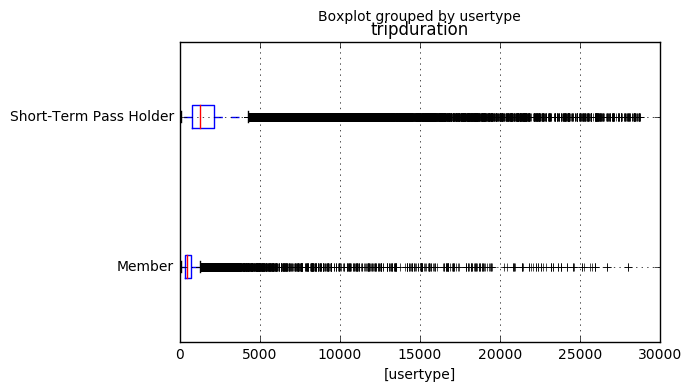

In [33]:
# Your answer here
# First boxplot is looking at trip duration by user type
boxpl = trip.boxplot(column = ['tripduration'], by = ['usertype'], vert = False)

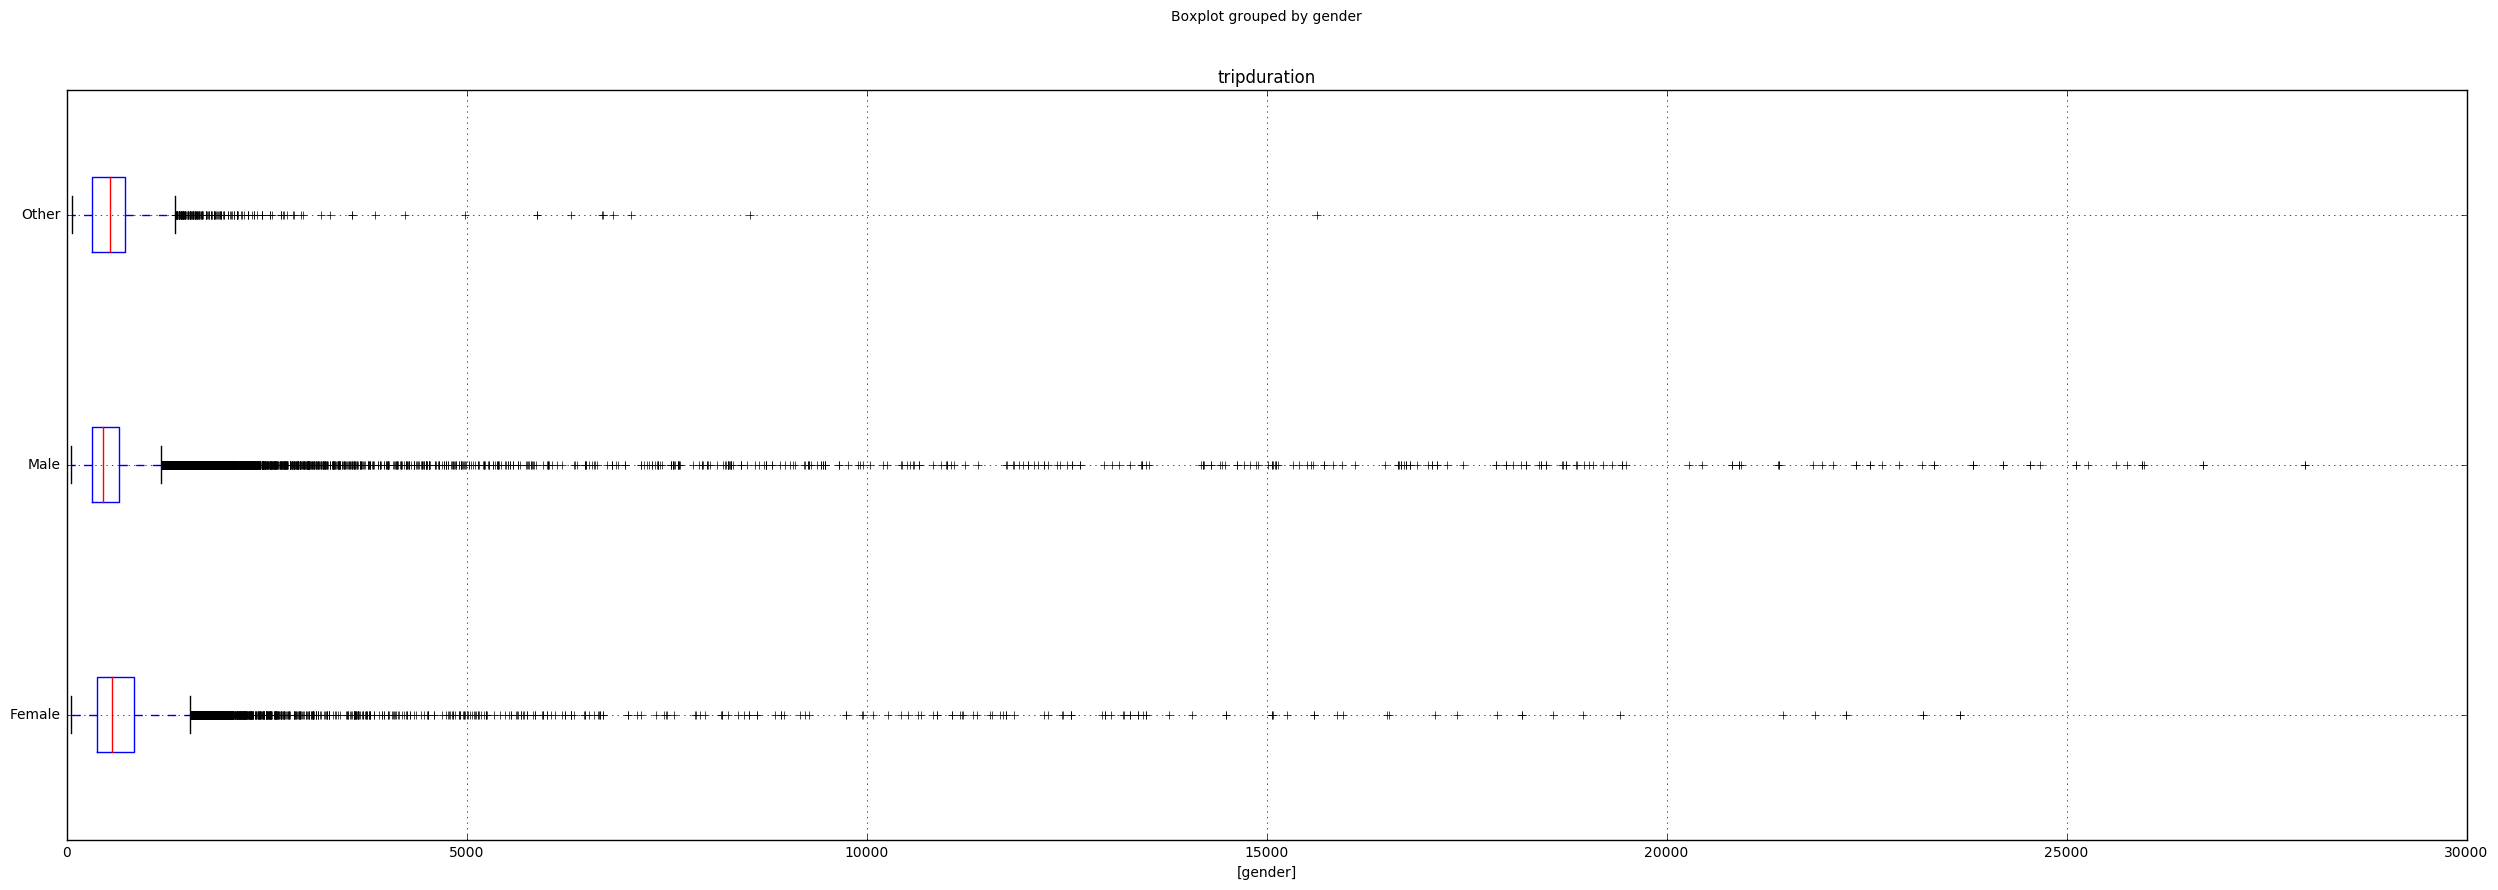

In [34]:
# Your answer here
# Second boxplot is looking at trip duration by gender
boxpl = trip.boxplot(column = ['tripduration'], by = ['gender'], vert = False, figsize=(30,10))

### Q 5.2 - Create a line plot of number of trips by date.

This is a little trickier because you can't simply use the `trip` dataframe.

Here's one I created using pandas. I made it look a little nicer with some matplotlib commands.

<img src="img/pandas_timeseries_ggplot.png" alt="Pandas time series plot" />

One of my blog posts is quite helpful.

http://nbviewer.jupyter.org/github/misken/hselab-tutorials/blob/master/hillpy_plotting_matplotlib_basic_recipe.ipynb

Here's a little code to helep you out (I did each block in different cells):

    trips_bydate = ???
    trips_bydate.name = 'numtrips'

    plt.style.use('ggplot')

    trips_bydate.???
    plt.???
    ???

Use as many code cells as needed.

In [35]:
# I did this slightly different than your set up
# first need to use groupby with count to find out how many "trips" were on each date
# I used trip duration to help count because I knew each trip had a trip duration (no NA)
trips_bydate = trip.groupby(['tripdate'])['tripduration'].count()

# Create new data frame with this groupby to use for line graph
DataFrame.trips_bydate_df = trips_bydate
trips_bydate.name = 'numtrips'

# Print to make sure new data frame is correct
print (trips_bydate[:10])

tripdate
2014-10-13     818
2014-10-14     982
2014-10-15     626
2014-10-16     790
2014-10-17     588
2014-10-18     798
2014-10-19    1332
2014-10-20     778
2014-10-21     714
2014-10-22     282
Name: numtrips, dtype: int64


In [36]:
plt.style.use('ggplot')
#this is a brute force way to change my default background color
#I did not use it because it changes all my plots, but kept it for future reference
#plt.rcParams['axes.facecolor'] = 'yellow'

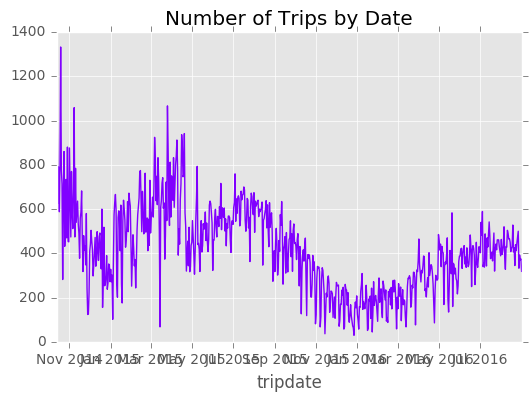

In [37]:
# I played with the colors for added fun
trips_bydate.plot.line(x='tripdate', y='tripduration', colormap = 'rainbow', title = 
                       'Number of Trips by Date')


## Step 6 - Save your data
Since you've added a few new columns to your dataset, you decide you'd like to save it so that you can reuse it for later analysis. You can read about pandas I/O at http://pandas.pydata.org/pandas-docs/stable/io.html. Of course you can always simply write it back out to a csv file. However, I'd like you to explore other options. Export the `trip` `DataFrame` to a SQLite database. You figure it out. Make sure you include the code in this notebook that shows the export to SQLite database as well as reading it back in to test and make sure it worked. Provide some explanation along with the code. Name your exported file with *trip_enriched_lastname.sqlite*.

In [38]:
# import sqlite
import sqlite3

# establish connection with sqllite database
con = sqlite3.connect("trip_enriched_sarna.sqlite")

# Send/write to sqlite database
trip.to_sql('trip_data',con = con, if_exists = 'replace')

In [39]:
# verify that it worked
# Read sqlite query results into a pandas df

con = sqlite3.connect("trip_enriched_sarna.sqlite")
trip_sql_test = pd.read_sql_query("SELECT * from trip_data", con)

# verify that result of SQL query is stored in the dataframe
print(trip_sql_test.head())


   index  trip_id            starttime             stoptime    bikeid  \
0      0      431  2014-10-13 10:31:00  2014-10-13 10:48:00  SEA00298   
1      1      432  2014-10-13 10:32:00  2014-10-13 10:48:00  SEA00195   
2      2      433  2014-10-13 10:33:00  2014-10-13 10:48:00  SEA00486   
3      3      434  2014-10-13 10:34:00  2014-10-13 10:48:00  SEA00333   
4      4      435  2014-10-13 10:34:00  2014-10-13 10:49:00  SEA00202   

   tripduration    from_station_name  \
0       985.935  2nd Ave & Spring St   
1       926.375  2nd Ave & Spring St   
2       883.831  2nd Ave & Spring St   
3       865.937  2nd Ave & Spring St   
4       923.923  2nd Ave & Spring St   

                                     to_station_name from_station_id  \
0  Occidental Park / Occidental Ave S & S Washing...          CBD-06   
1  Occidental Park / Occidental Ave S & S Washing...          CBD-06   
2  Occidental Park / Occidental Ave S & S Washing...          CBD-06   
3  Occidental Park / Occidental 

## Step 7 - Submit your assignment
There are two deliverables for this first part of the assignment:

1. this notebook with all of your answers included
1. the exported `trip DataFrame` from Step 6

Put both files into a folder called `HW3_<your last name>` and compress it as a gzipped tarball. My file would be `HW3_isken.tar.gz`. Submit that file via Moodle.

In [40]:
# I also included simply writing this new data frame to a csv file.
# I wanted to keep it for future reference. Eventhough I could simply "google" it in future, I like
# having as much as possible in these homework assignments
trip.to_csv('trip_enriched_sarna', index=True)